### **1.Predicción del precio de alquiler de una habitación en Airbnb en Madrid**

El objetivo de este proyecto es predecir el precio de alquilar una habitación en Airbnb utilizando un conjunto de datos que contiene información sobre propiedades en Madrid. El análisis se estructura en varias fases: exploración de datos, limpieza, transformación, generación de características, visualización, y modelado predictivo. Este enfoque garantiza que el modelo final sea robusto y pueda explicar cuáles son las principales variables que afectan al precio.

**Importación de librerías**

In [1]:
!pip install category_encoders

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy  as np  
import pandas as pd
import category_encoders as ce

import matplotlib.pyplot as plt
%matplotlib inline

### **2. Carga y Limpieza de Datos**

In [4]:
# Cargar el dataset

file_path = './Practica/airbnb-listings-extract.csv' 
house_data = pd.read_csv(file_path, sep=';')

# Inspección básica
print(house_data.shape)
house_data.head(5).T                                 # visualizamos 5 primeras filas

(14780, 89)


,0,1,2,3,4
ID,11210388,17471131,17584891,5398030,18104606
Listing Url,https://www.airbnb.com/rooms/11210388,https://www.airbnb.com/rooms/17471131,https://www.airbnb.com/rooms/17584891,https://www.airbnb.com/rooms/5398030,https://www.airbnb.com/rooms/18104606
Scrape ID,20170306202425,20170407214050,20170407214050,20170407214050,20170407214050
Last Scraped,2017-03-07,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,The Loft-Full Bath-Deck w/View,"Claris I, Friendly Rentals","Style Terrace Red, Friendly Rentals",Picasso Suite 1.4 Paseo de Gracia,Smart City Centre Apartment II
...,...,...,...,...,...
Cancellation Policy,moderate,super_strict_30,super_strict_30,strict,flexible
Calculated host listings count,1.0,106.0,106.0,24.0,92.0
Reviews per Month,3.5,0.86,NaN,1.09,NaN
Geolocation,"30.3373609355,-97.8632766782","41.3896829422,2.17262543017","41.3930345489,2.16217327868","41.3969668101,2.1674178103","41.3886851936,2.15514963616"


**Creamos la división en datasets de entrenamiento y prueba**

In [39]:
from sklearn.model_selection import train_test_split

full_df = pd.read_csv("./Practica/airbnb-listings-extract.csv", sep=';', decimal='.')

# División en datasets de entrenamiento y prueba
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos datasets divididos
train.to_csv('./Practica/airbnb_train.csv', sep=';', decimal='.')
test.to_csv('./Practica/airbnb_test.csv', sep=';', decimal='.')

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

house_data = pd.read_csv('./Practica/airbnb_train.csv', sep=';', decimal='.')

house_data.head(5).T

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


,0,1,2,3,4
Unnamed: 0,2472,12299,4024,12692,11228
ID,5994463,14136180,15520134,8809721,1162707
Listing Url,https://www.airbnb.com/rooms/5994463,https://www.airbnb.com/rooms/14136180,https://www.airbnb.com/rooms/15520134,https://www.airbnb.com/rooms/8809721,https://www.airbnb.com/rooms/1162707
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,PISO ATOCHA- FLAT NEAR ATOCHA .,The Palace Sol Madrid.,por persona la noche metro linea5 vista alegre,CITY CENTER JACINTO BENAVENTE ROOM4,NICE & BIG DOUBLE ROOM AT DOWNTOWN
Summary,Piso recién reformado cómoda habitación con ba...,"Lugares de interés: Plaza Mayor, Plaza del Sol...","我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",This stunning and amazig room is covered with ...,NaN
Space,"Un piso muy cómodo en Jerónimos, una de las zo...",El apartamento dispone de un dormitorio indepe...,NaN,NaN,We are a young couple; David (Spain) and Ana (...
Description,Piso recién reformado cómoda habitación con ba...,"Lugares de interés: Plaza Mayor, Plaza del Sol...","我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",This stunning and amazig room is covered with ...,We are a young couple; David (Spain) and Ana (...
Experiences Offered,none,none,none,none,none


In [40]:
house_data.describe()

,Unnamed: 0,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,11824.000000,1.182400e+04,1.182400e+04,1.182400e+04,10317.000000,11821.000000,11821.000000,11824.000000,11824.000000,11824.000000,11780.000000,11804.00000,11787.000000,474.000000,11809.000000,2881.000000,2869.000000,5052.000000,6974.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,9163.000000,9143.000000,9148.000000,9136.000000,9147.000000,9133.000000,9132.000000,11820.000000,9285.000000
mean,7369.723698,1.025308e+07,2.017038e+13,3.588310e+07,94.803722,12.754420,12.754420,40.491628,-3.776863,3.277486,1.285229,1.34429,2.049122,396.489451,73.712592,378.437348,1432.390728,189.312154,32.073129,1.581614,7.637601,3.109946,961.732070,8.949002,22.949256,39.803958,202.217185,22.664834,91.628179,9.410040,9.320726,9.623905,9.647863,9.534655,9.211345,9.615313,1.873326
std,4269.871487,5.566485e+06,5.505346e+08,3.411993e+07,15.247078,34.578895,34.578895,4.701030,14.014695,2.093973,0.664691,0.90518,1.623489,671.125823,71.624844,194.751472,1236.992934,116.011858,31.278032,1.160518,12.373491,13.427477,9387.640642,9.340334,19.762734,29.663314,128.006830,38.092338,9.137614,0.938013,1.004472,0.804050,0.765450,0.770421,0.963131,23.795580,1.869157
min,0.000000,1.986400e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.124429,1.000000,0.000000,0.00000,1.000000,0.000000,9.000000,70.000000,250.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,3641.500000,5.510692e+06,2.017041e+13,6.855490e+06,100.000000,1.000000,1.000000,40.409758,-3.707538,2.000000,1.000000,1.00000,1.000000,0.000000,34.000000,220.000000,720.000000,100.000000,15.000000,1.000000,0.000000,1.000000,365.000000,0.000000,4.000000,11.000000,78.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,7373.500000,1.125754e+07,2.017041e+13,2.454770e+07,100.000000,2.000000,2.000000,40.419331,-3.700763,3.000000,1.000000,1.00000,2.000000,90.000000,55.000000,350.000000,1200.000000,150.000000,25.000000,1.000000,0.000000,2.000000,1125.000000,6.000000,20.000000,38.000000,240.000000,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.210000
75%,11064.250000,1.531982e+07,2.017041e+13,5.431096e+07,100.000000,6.000000,6.000000,40.430778,-3.683917,4.000000,1.000000,2.00000,2.000000,624.000000,87.000000,500.000000,1750.000000,200.000000,40.000000,2.000000,15.000000,3.000000,1125.000000,14.000000,38.000000,65.000000,319.000000,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,14777.000000,1.858361e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,10.00000,16.000000,6997.000000,969.000000,999.000000,25000.000000,990.000000,662.000000,16.000000,500.000000,1125.000000,1000000.000000,30.000000,60.000000,90.000000,365.000000,356.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [41]:
# Configuración para mostrar todas las columnas y filas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_rows', None)     # Mostrar todas las filas

house_data.isnull().any(), house_data.isnull().sum()

(Unnamed: 0                        False
 ID                                False
 Listing Url                       False
 Scrape ID                         False
 Last Scraped                      False
 Name                               True
 Summary                            True
 Space                              True
 Description                        True
 Experiences Offered               False
 Neighborhood Overview              True
 Notes                              True
 Transit                            True
 Access                             True
 Interaction                        True
 House Rules                        True
 Thumbnail Url                      True
 Medium Url                         True
 Picture Url                        True
 XL Picture Url                     True
 Host ID                           False
 Host URL                          False
 Host Name                          True
 Host Since                         True
 Host Location  

**Filtro**

Filtro las propiedades localizadas en Madrid según las coordenadas geográficas (Latitude y Longitude) y verifico que estas columnas no contienen valores nulos. 
Entiendo que limito el análisis a Madrid y evito ruido en los datos y aseguro que el modelo esté enfocado en un mercado específico, lo que mejora la precisión.

In [42]:
# Filtrar solo propiedades en Madrid
house_data = house_data[
    (house_data['Latitude'] >= 40.3) & (house_data['Latitude'] <= 40.5) &
    (house_data['Longitude'] >= -3.8) & (house_data['Longitude'] <= -3.6)
]

### **3. Imputación y Codificación de Variables Categóricas**

He escogido imputar con la moda, ya que suelen tener valores repetidos y es un buen estimador para representar las categorías más comunes.
Las columnas categóricas seleccionadas son:
- 'Room Type': Representa el tipo de habitación (entera, privada, compartida). Es importante para predecir el precio, ya que cada tipo tiene un rango de precios asociado.
- 'Property Type': Indica el tipo de propiedad (apartamento, casa, etc.), lo cual afecta significativamente el precio.
- 'Cancellation Policy': Define las políticas de cancelación, que pueden ser un factor relevante para huéspedes y afectar el costo.

He escogido imputar con la 'media', ya que estas características tienen valores continuos y la media es adecuada para representar el promedio de los datos faltantes.
Las columnas numéricas seleccionadas son:
- 'Price': El precio es la variable objetivo del análisis, por lo que su imputación es esencial para mantener la consistencia del dataset.
- 'Bathrooms', 'Bedrooms' y 'Beds': Estas columnas son características clave que describen las propiedades y están directamente relacionadas con el precio.


In [43]:
# Imputar con la moda para columnas categóricas
columns_with_mode = ['Room Type', 'Property Type', 'Cancellation Policy']
for col in columns_with_mode:
    house_data[col] = house_data[col].fillna(house_data[col].mode()[0])

# Imputar con la media para columnas numéricas
columns_with_mean = ['Price', 'Bathrooms', 'Bedrooms', 'Beds']
for col in columns_with_mean:
    house_data[col] = house_data[col].fillna(house_data[col].mean())


In [44]:
house_data.dtypes

Unnamed: 0                          int64
ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
Summary                            object
Space                              object
Description                        object
Experiences Offered                object
Neighborhood Overview              object
Notes                              object
Transit                            object
Access                             object
Interaction                        object
House Rules                        object
Thumbnail Url                      object
Medium Url                         object
Picture Url                        object
XL Picture Url                     object
Host ID                             int64
Host URL                           object
Host Name                          object
Host Since                        

**Codificación de variables categóricas**

Las siguientes columnas fueron seleccionadas porque son relevantes para la predicción del precio y son categóricas, por lo que requieren codificación.
Codifico las siguientes columnas categóricas en valores numéricos utilizando `LabelEncoder`. 

Columnas seleccionadas para codificación:
- 'Room Type': Tipo de habitación (entera, privada, compartida). Esta variable es crucial para predecir el precio, ya que los tipos de habitaciones tienen impactos diferentes en el costo.
- 'Property Type': Tipo de propiedad (apartamento, casa, hotel, etc.). Es una característica clave para entender el rango de precios y la categoría del alojamiento.
- 'Cancellation Policy': Representa la política de cancelación del anfitrión, que afecta la flexibilidad y puede influir en las preferencias de los huéspedes.
- 'Neighbourhood Group Cleansed': Indica la zona de la propiedad. La ubicación es uno de los factores más determinantes en el precio.

In [45]:
from sklearn.preprocessing import LabelEncoder

# Definir las columnas categóricas a codificar
columns_label_encode = ['Room Type', 'Property Type', 'Cancellation Policy', 'Neighbourhood Group Cleansed']

# Inicializar el LabelEncoder
label_encoders = {}  # Guardar los encoders para cada columna

# Aplicar LabelEncoder a cada columna
for column in columns_label_encode:
    le = LabelEncoder()
    house_data[column] = le.fit_transform(house_data[column])
    label_encoders[column] = le  # Guardar el encoder para referencia futura

# Ver los valores codificados y sus significados
for column, le in label_encoders.items():
    print(f"Categorías codificadas para '{column}':")
    for class_, encoded_value in zip(le.classes_, le.transform(le.classes_)):
        print(f"  {class_}: {encoded_value}")
    print("\n")


Categorías codificadas para 'Room Type':
  Entire home/apt: 0
  Private room: 1
  Shared room: 2


Categorías codificadas para 'Property Type':
  Apartment: 0
  Bed & Breakfast: 1
  Boutique hotel: 2
  Bungalow: 3
  Camper/RV: 4
  Casa particular: 5
  Chalet: 6
  Condominium: 7
  Dorm: 8
  Earth House: 9
  Guest suite: 10
  Guesthouse: 11
  Hostel: 12
  House: 13
  Loft: 14
  Other: 15
  Serviced apartment: 16
  Tent: 17
  Townhouse: 18
  Villa: 19


Categorías codificadas para 'Cancellation Policy':
  flexible: 0
  moderate: 1
  strict: 2
  super_strict_30: 3
  super_strict_60: 4


Categorías codificadas para 'Neighbourhood Group Cleansed':
  Arganzuela: 0
  Barajas: 1
  Carabanchel: 2
  Centro: 3
  Chamartín: 4
  Chamberí: 5
  Ciudad Lineal: 6
  Fuencarral - El Pardo: 7
  Hortaleza: 8
  Latina: 9
  Moncloa - Aravaca: 10
  Moratalaz: 11
  Puente de Vallecas: 12
  Retiro: 13
  Salamanca: 14
  San Blas - Canillejas: 15
  Tetuán: 16
  Usera: 17
  Vicálvaro: 18
  Villa de Vallecas: 19
  V

**Eliminación de columnas innecesarias del dataset**

Elimino todas aquellas columnas que no son relevantes para el análisis y modelado. En lugar de escribir explícitamente todas las columnas que quiero eliminar, definimos únicamente las columnas que quiero conservar en una lista, lo que hace el proceso más eficiente y legible.

Defino las columnas a conservar:
- Características geográficas: 'Latitude', 'Longitude', que permiten identificar la ubicación.
- Características de capacidad: 'Accommodates', 'Guests Included', 'Extra People', 'Bathrooms', 'Bedrooms', 'Beds', que describen la capacidad de la propiedad.
- Métricas de disponibilidad: 'Availability 30', 'Availability 60', 'Availability 90','Availability 365', que indican la disponibilidad de la propiedad a lo largo del tiempo.
- Métricas de actividad: 'Number of Reviews', 'Calculated host listings count', que reflejan la popularidad y actividad del anfitrión.
- Información de precio: 'Price' (variable objetivo) y 'Room Type', 'Property Type', 'Cancellation Policy', que son categóricas y afectan al precio.
- 'Neighbourhood Group Cleansed': Agrega contexto geográfico adicional sobre el vecindario.


In [46]:
# Definir las columnas que queremos conservar
columns_to_keep = [
    'Host Listings Count', 'Latitude', 'Longitude', 'Accommodates', 'Guests Included',
    'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30',
    'Availability 60', 'Availability 90', 'Availability 365', 'Number of Reviews',
    'Calculated host listings count', 'Bathrooms', 'Bedrooms', 'Beds', 'Price',  # Columna objetivo
    'Room Type', 'Property Type', 'Cancellation Policy', 'Neighbourhood Group Cleansed'
]

# Eliminar todas las columnas que no estén en la lista
house_data = house_data[columns_to_keep]

# Verificar el resultado
house_data.head(5).T


,0,1,2,3,4
Host Listings Count,2.000000,1.000000,16.000000,114.000000,2.000000
Latitude,40.407732,40.415802,40.389048,40.412814,40.438631
Longitude,-3.684819,-3.705340,-3.740374,-3.703052,-3.713716
Accommodates,4.000000,4.000000,1.000000,2.000000,2.000000
Guests Included,1.000000,1.000000,1.000000,1.000000,1.000000
Extra People,0.000000,0.000000,0.000000,0.000000,10.000000
Minimum Nights,2.000000,1.000000,3.000000,10.000000,1.000000
Maximum Nights,1125.000000,1125.000000,30.000000,1125.000000,1125.000000
Availability 30,9.000000,15.000000,14.000000,0.000000,7.000000
Availability 60,32.000000,39.000000,44.000000,6.000000,34.000000


In [47]:
# Configuración para mostrar todas las columnas y filas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_rows', None)     # Mostrar todas las filas

house_data.isnull().any(), house_data.isnull().sum()

(Host Listings Count                True
 Latitude                          False
 Longitude                         False
 Accommodates                      False
 Guests Included                   False
 Extra People                      False
 Minimum Nights                    False
 Maximum Nights                    False
 Availability 30                   False
 Availability 60                   False
 Availability 90                   False
 Availability 365                  False
 Number of Reviews                 False
 Calculated host listings count    False
 Bathrooms                         False
 Bedrooms                          False
 Beds                              False
 Price                             False
 Room Type                         False
 Property Type                     False
 Cancellation Policy               False
 Neighbourhood Group Cleansed      False
 dtype: bool,
 Host Listings Count               3
 Latitude                          0
 Longitude

In [48]:
house_data.dtypes

Host Listings Count               float64
Latitude                          float64
Longitude                         float64
Accommodates                        int64
Guests Included                     int64
Extra People                        int64
Minimum Nights                      int64
Maximum Nights                      int64
Availability 30                     int64
Availability 60                     int64
Availability 90                     int64
Availability 365                    int64
Number of Reviews                   int64
Calculated host listings count    float64
Bathrooms                         float64
Bedrooms                          float64
Beds                              float64
Price                             float64
Room Type                           int32
Property Type                       int32
Cancellation Policy                 int32
Neighbourhood Group Cleansed        int32
dtype: object

## 4. Visualización (y más análisis)

Creo histogramas para analizar las distribuciones de las columnas numéricas seleccionadas relacionadas con la capacidad de las propiedades, permitiendo identificar patrones, valores típicos y posibles
outliers en las características analizadas.

Tambien genero histogramas para analizar la distribución de las columnas relacionadas con la disponibilidad de las propiedades en diferentes periodos de tiempo (30, 60, 90 y 365 días). 

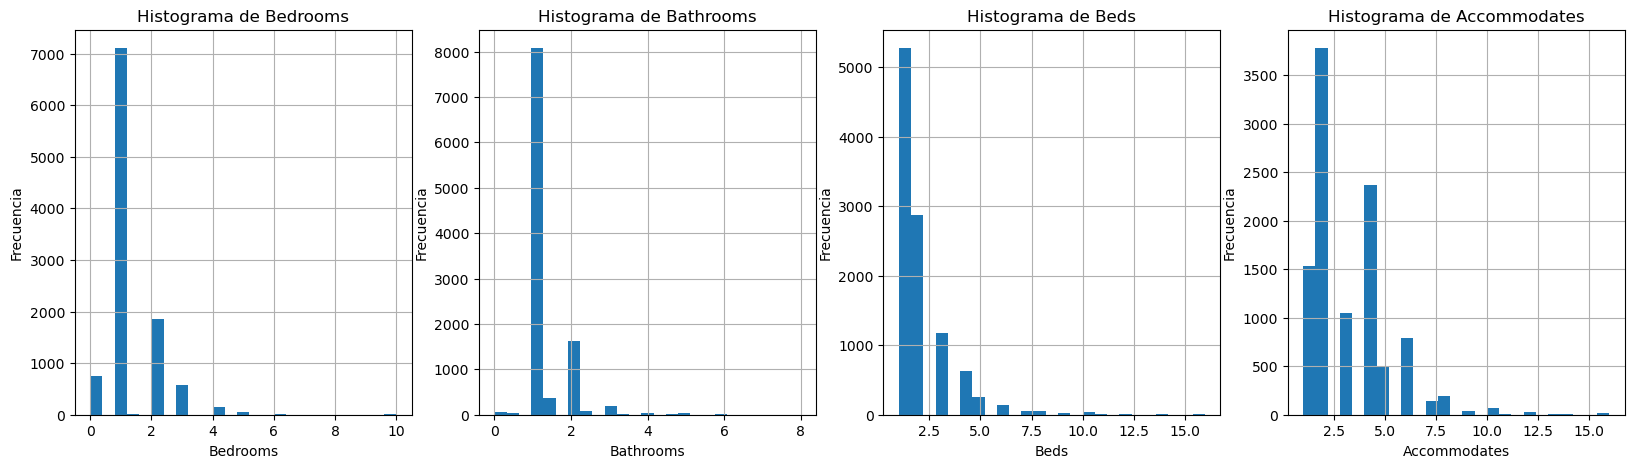

In [49]:
# Histogramas para las columnas seleccionadas

plt.figure(figsize=(20, 5))

plt.subplot(1,4,1)
house_data['Bedrooms'].plot.hist(alpha=1, bins=25, grid = True)
plt.title(f'Histograma de Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Frecuencia')

plt.subplot(1,4,2)
house_data['Bathrooms'].plot.hist(alpha=1, bins=25, grid = True)
plt.title(f'Histograma de Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Frecuencia')

plt.subplot(1,4,3)
house_data['Beds'].plot.hist(alpha=1, bins=25, grid = True)
plt.title(f'Histograma de Beds')
plt.xlabel('Beds')
plt.ylabel('Frecuencia')

plt.subplot(1,4,4)
house_data['Accommodates'].plot.hist(alpha=1, bins=25, grid = True)
plt.title(f'Histograma de Accommodates')
plt.xlabel('Accommodates')
plt.ylabel('Frecuencia')

plt.show()

Observaciones:

Histograma de Bedrooms (dormitorios)

La mayoría de las propiedades tienen 1 o 2 dormitorios.
Existen propiedades con 0 dormitorios, lo cual es atípico y podría referirse a estudios o espacios compartidos.
Hay muy pocas propiedades con más de 4 dormitorios, lo que sugiere que estos valores pueden ser outliers o propiedades muy grandes.
Conclusión: La distribución es altamente sesgada a la izquierda, indicando que la mayoría de las propiedades tienen pocos dormitorios.

Histograma de Bathrooms (baños)
Observaciones:

La mayoría de las propiedades tienen 1 baño.
Existen propiedades con 0 baños, lo cual puede significar información faltante o propiedades compartidas.
Las propiedades con más de 2 baños son escasas, con valores muy poco frecuentes a partir de 3 baños.
Conclusión: Al igual que los dormitorios, la distribución de baños está sesgada a la izquierda con valores atípicos en propiedades con más de 3 baños.

Histograma de Beds (camas)
Observaciones:

La mayoría de las propiedades tienen entre 1 y 2 camas.
Existen valores de 0 camas, que probablemente indiquen que sean otro tipo de mobiliario como un sillón o un sofá.
Algunas propiedades tienen un número elevado de camas (superior a 10), lo cual sugiere outliers.
Conclusión: La distribución es sesgada a la izquierda, con valores atípicos en propiedades con muchas camas.

Histograma de Accommodates (capacidad de alojamiento)
Observaciones:

La mayoría de las propiedades alojan entre 1 y 4 personas.
Existen propiedades con capacidad para más de 10 personas, pero son muy poco frecuentes.
La capacidad de alojamiento disminuye conforme aumenta el número de personas.
Conclusión: La distribución de capacidad de alojamiento muestra un patrón sesgado a la izquierda, con valores atípicos en propiedades que alojan más de 10-12 personas.

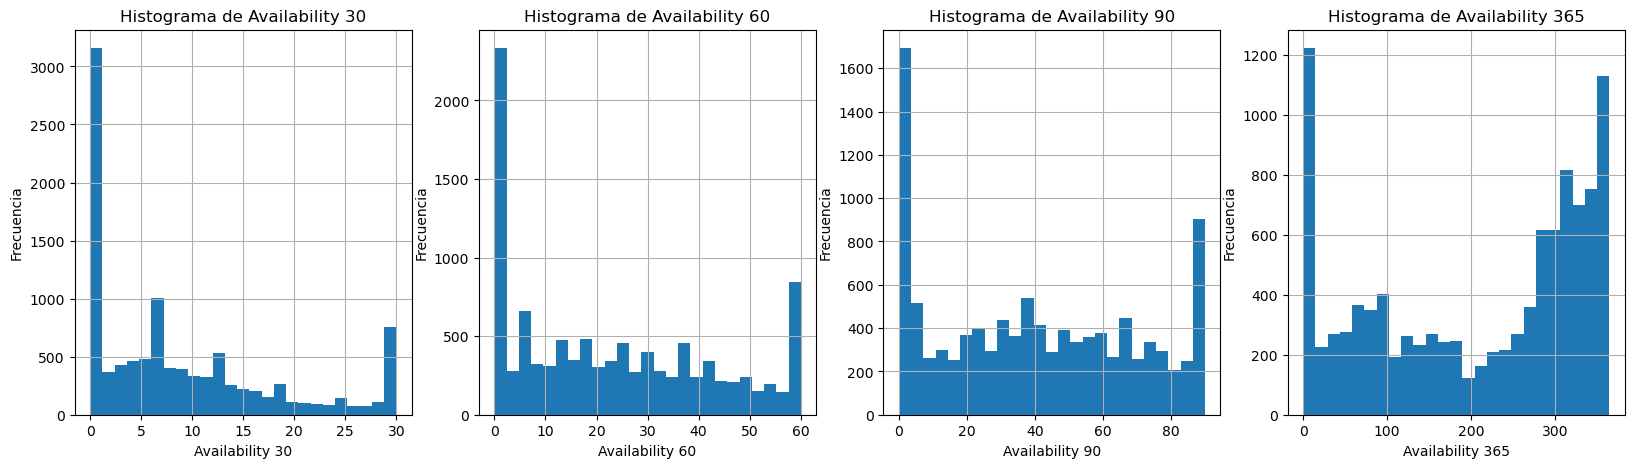

In [50]:
# Histogramas para las columnas seleccionadas

plt.figure(figsize=(20, 5))

plt.subplot(1,4,1)
house_data['Availability 30'].plot.hist(alpha=1, bins=25, grid = True)
plt.title(f'Histograma de Availability 30')
plt.xlabel('Availability 30')
plt.ylabel('Frecuencia')

plt.subplot(1,4,2)
house_data['Availability 60'].plot.hist(alpha=1, bins=25, grid = True)
plt.title(f'Histograma de Availability 60')
plt.xlabel('Availability 60')
plt.ylabel('Frecuencia')

plt.subplot(1,4,3)
house_data['Availability 90'].plot.hist(alpha=1, bins=25, grid = True)
plt.title(f'Histograma de Availability 90')
plt.xlabel('Availability 90')
plt.ylabel('Frecuencia')

plt.subplot(1,4,4)
house_data['Availability 365'].plot.hist(alpha=1, bins=25, grid = True)
plt.title(f'Histograma de Availability 365')
plt.xlabel('Availability 365')
plt.ylabel('Frecuencia')

plt.show()

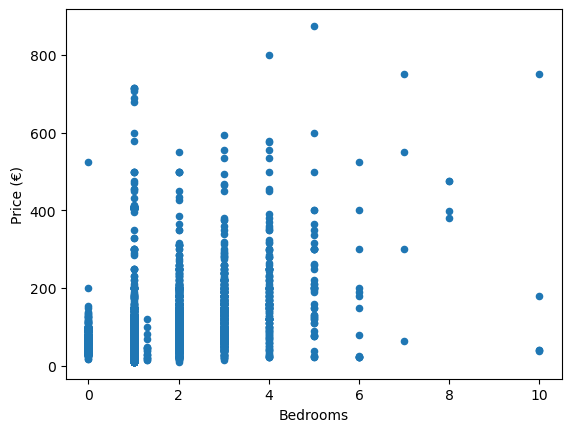

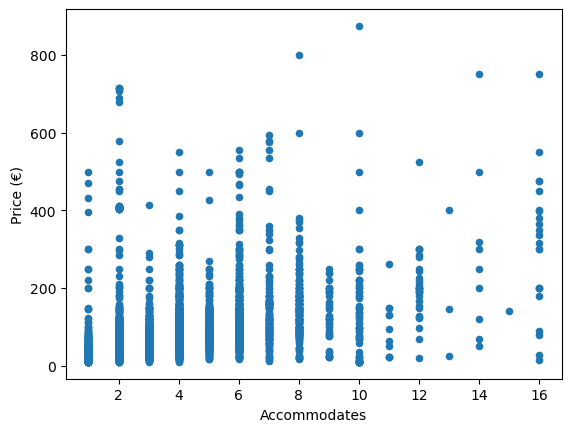

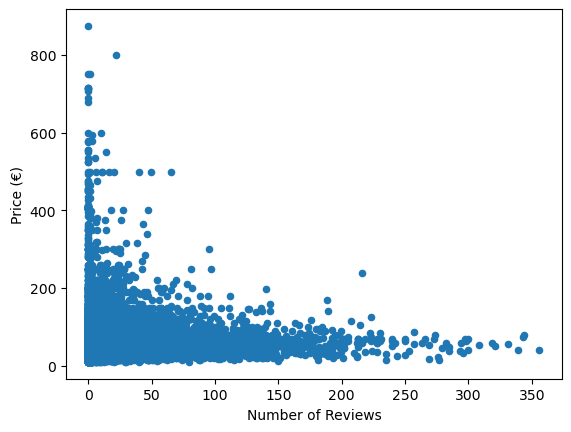

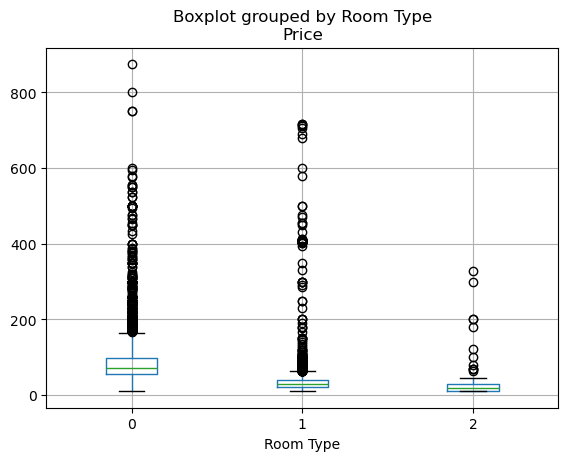

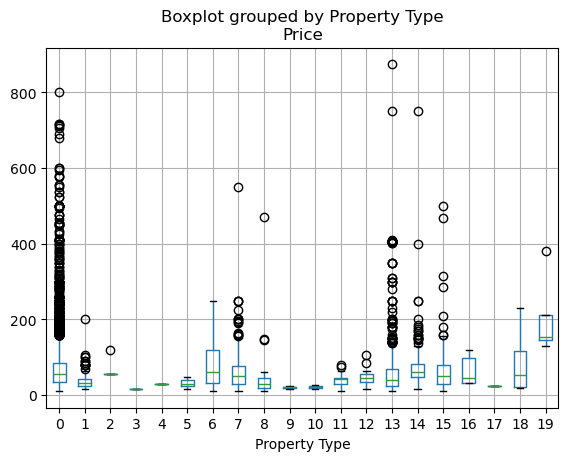

In [51]:
# Sólo representamos 3: bedrooms, sqm_living y waterfront
# el resto se puede repetir una a una

house_data.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price (€)')
plt.show()

house_data.plot(kind = 'scatter',x='Accommodates',y = 'Price')
plt.xlabel('Accommodates')
plt.ylabel('Price (€)')
plt.show()
house_data.plot(kind = 'scatter',x='Number of Reviews',y = 'Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Price (€)')
plt.show()

house_data.boxplot(by='Room Type',column = 'Price')
plt.show()

house_data.boxplot(by='Property Type',column = 'Price')
plt.show()


**Categorías codificadas para 'Room Type':**
- Entire home/apt: 0
- Private room: 1
- Shared room: 2

**Categorías codificadas para 'Property Type':**
- Apartment: 0
- Bed & Breakfast: 1
- Boutique hotel: 2
- Bungalow: 3
- Camper/RV: 4
- Casa particular: 5
- Chalet: 6
- Condominium: 7
- Dorm: 8
- Earth House: 9
- Guest suite: 10
- Guesthouse: 11
- Hostel: 12
- House: 13
- Loft: 14
- Other: 15
- Serviced apartment: 16
- Tent: 17
- Townhouse: 18
- Villa: 19

**Eliminación de outliers**

In [52]:
property_categories = {
    0: "Apartment",
    1: "Bed & Breakfast",
    2: "Boutique Hotel",
    3: "Bungalow",
    4: "Camper/RV",
    5: "Casa Particular",
    6: "Chalet",
    7: "Condominium",
    8: "Dorm",
    9: "Earth House",
    10: "Guest Suite",
    11: "Guesthouse",
    12: "Hostel",
    13: "House",
    14: "Loft",
    15: "Other",
    16: "Serviced Apartment",
    17: "Tent",
    18: "Townhouse",
    19: "Villa"
}

# Crear un diccionario para almacenar los resultados
property_counts = {}

# Iterar por cada categoría y contar las ocurrencias en 'Property Type'
for category_id, category_name in property_categories.items():
    count = house_data[house_data['Property Type'] == category_id].shape[0]
    property_counts[category_name] = count
    print(f"{category_name}: {count}")

# Opcional: Mostrar resultados ordenados
sorted_property_counts = sorted(property_counts.items(), key=lambda x: x[1], reverse=True)
for category_name, count in sorted_property_counts:
    print(f"{category_name}: {count}")



Apartment: 8726
Bed & Breakfast: 256
Boutique Hotel: 5
Bungalow: 1
Camper/RV: 1
Casa Particular: 3
Chalet: 18
Condominium: 258
Dorm: 37
Earth House: 2
Guest Suite: 2
Guesthouse: 29
Hostel: 13
House: 774
Loft: 227
Other: 161
Serviced Apartment: 9
Tent: 1
Townhouse: 8
Villa: 4
Apartment: 8726
House: 774
Condominium: 258
Bed & Breakfast: 256
Loft: 227
Other: 161
Dorm: 37
Guesthouse: 29
Chalet: 18
Hostel: 13
Serviced Apartment: 9
Townhouse: 8
Boutique Hotel: 5
Villa: 4
Casa Particular: 3
Earth House: 2
Guest Suite: 2
Bungalow: 1
Camper/RV: 1
Tent: 1


In [53]:
# Categorías a eliminar
categories_to_remove = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 16, 17, 18, 19]

# Filtrar el dataset para mantener solo las categorías relevantes
house_data_filtered = house_data[~house_data['Property Type'].isin(categories_to_remove)]

# Verificar el resultado
print(house_data_filtered['Property Type'].value_counts())


Property Type
0     8726
13     774
1      256
14     227
11      29
12      13
Name: count, dtype: int64


In [54]:
outliers_extremos = house_data[
    (house_data['Bedrooms'] > 6) | 
    (house_data['Bathrooms'] > 5) | 
    (house_data['Beds'] > 10) | 
    (house_data['Accommodates'] > 12)
]

print(outliers_extremos[['Property Type', 'Bedrooms', 'Bathrooms', 'Beds', 'Accommodates']])

       Property Type   Bedrooms  Bathrooms       Beds  Accommodates
181               12   1.000000        3.0  10.000000            16
295               19   8.000000        5.5  14.000000            16
500                0   4.000000        2.0  11.000000            14
855               13   1.000000        5.5   1.000000             3
1075               6   4.000000        3.0  12.000000            11
1240              19   4.000000        3.0  12.000000            12
1327               0   6.000000        2.0  16.000000            16
1460               0   4.000000        4.0  11.000000            16
1540               1  10.000000        6.0  16.000000             1
1663               0   7.000000        4.5  15.000000            16
1680               1   1.000000        6.0   1.000000             2
1882               0   1.000000        4.0  14.000000            16
1972               0   6.000000        6.0   2.000000            12
2398               0   5.000000        3.0  14.0

In [55]:
# Filtrar propiedades con Availability en 0 y Número de Reviews cercano a 0
availability_zero_reviews_low = house_data[
    ((house_data['Availability 30'] == 0) |
     (house_data['Availability 60'] == 0) |
     (house_data['Availability 90'] == 0) |
     (house_data['Availability 365'] == 0)) &
    (house_data['Number of Reviews'] <= 1)  # Ajusta el umbral según sea necesario
]

# Ver el resultado
print(availability_zero_reviews_low.shape)
print(availability_zero_reviews_low[['Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 'Number of Reviews']].head())


(1209, 22)
    Availability 30  Availability 60  Availability 90  Availability 365  \
3                 0                6               36               311   
7                 0                0               18                74   
11                0                0                6               281   
16                0                0                0                 0   
33                0                6               12                92   

    Number of Reviews  
3                   0  
7                   0  
11                  0  
16                  0  
33                  1  


In [56]:
# Filtrar propiedades con Availability en 0 en todas las columnas
fully_inactive_properties = house_data[
    (house_data['Availability 30'] == 0) &
    (house_data['Availability 60'] == 0) &
    (house_data['Availability 90'] == 0) &
    (house_data['Availability 365'] == 0)
]

# Eliminar estas propiedades del dataset original
house_data_filtered = house_data.drop(fully_inactive_properties.index)

# Verificar
print(f"Propiedades eliminadas: {fully_inactive_properties.shape[0]}")
print(f"Dataset resultante: {house_data_filtered.shape}")


Propiedades eliminadas: 893
Dataset resultante: (9642, 22)


In [57]:
# Comparar el tamaño del dataset original con el modificado después de eliminar outliers e inactivos
print(
    f'Original: {house_data.shape[0]} // '
    f'Modificado: {house_data_filtered.shape[0]}\n'
    f'Diferencia: {house_data.shape[0] - house_data_filtered.shape[0]}'
)
print(
    f'Variación: {((house_data.shape[0] - house_data_filtered.shape[0]) / house_data.shape[0]) * 100:.2f}%'
)


Original: 10535 // Modificado: 9642
Diferencia: 893
Variación: 8.48%


In [58]:
house_data.corr() # matriz de correlación

,Host Listings Count,Latitude,Longitude,Accommodates,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Calculated host listings count,Bathrooms,Bedrooms,Beds,Price,Room Type,Property Type,Cancellation Policy,Neighbourhood Group Cleansed
Host Listings Count,1.000000,0.014364,-0.038022,0.126491,0.054433,0.019975,0.025170,0.004250,-0.051338,-0.059682,-0.051470,0.050525,-0.095056,0.905273,0.154093,0.070857,0.082103,0.164987,-0.109632,-0.085763,0.250978,-0.027916
Latitude,0.014364,1.000000,0.213476,0.002178,-0.013013,-0.002512,-0.005330,0.005138,0.069213,0.066229,0.058879,0.037229,-0.070268,0.014931,0.038221,0.025796,0.018611,0.120396,-0.018962,0.045008,-0.039154,0.183631
Longitude,-0.038022,0.213476,1.000000,-0.044600,-0.028390,-0.015830,0.000258,-0.002936,0.036139,0.035391,0.036191,-0.001553,-0.044190,-0.039239,0.011891,0.010724,-0.018282,-0.041849,0.045678,0.036785,-0.039147,0.371983
Accommodates,0.126491,0.002178,-0.044600,1.000000,0.579907,0.279163,0.000847,0.000799,-0.069867,-0.062581,-0.068686,0.079242,0.086104,0.129265,0.331659,0.673633,0.821571,0.512650,-0.491595,-0.052347,0.220893,-0.062832
Guests Included,0.054433,-0.013013,-0.028390,0.579907,1.000000,0.357015,0.001191,-0.005224,-0.089394,-0.074709,-0.073119,0.058600,0.122976,0.056002,0.194126,0.429732,0.456095,0.320772,-0.360986,-0.029449,0.198636,-0.064583
Extra People,0.019975,-0.002512,-0.015830,0.279163,0.357015,1.000000,-0.018471,-0.002424,0.038871,0.051921,0.052441,0.102075,0.073082,0.018571,0.097281,0.149794,0.217584,0.085962,-0.106533,-0.009350,0.156583,-0.052061
Minimum Nights,0.025170,-0.005330,0.000258,0.000847,0.001191,-0.018471,1.000000,-0.001077,-0.017176,-0.024450,-0.024035,0.002812,-0.035536,0.027103,0.025066,0.013644,0.000246,0.027671,-0.027512,-0.003345,0.033324,0.019026
Maximum Nights,0.004250,0.005138,-0.002936,0.000799,-0.005224,-0.002424,-0.001077,1.000000,0.002051,0.000601,-0.000700,0.010599,-0.005655,0.005305,-0.003841,-0.000012,0.000801,0.002471,-0.007514,0.002314,0.004191,-0.003621
Availability 30,-0.051338,0.069213,0.036139,-0.069867,-0.089394,0.038871,-0.017176,0.002051,1.000000,0.922544,0.852845,0.421739,-0.132393,-0.059044,-0.026658,-0.030745,-0.005566,0.072327,0.253943,0.092665,-0.099542,0.104606
Availability 60,-0.059682,0.066229,0.035391,-0.062581,-0.074709,0.051921,-0.024450,0.000601,0.922544,1.000000,0.964059,0.485225,-0.109170,-0.061903,-0.039622,-0.039708,-0.007816,0.049246,0.233849,0.079754,-0.062916,0.087508


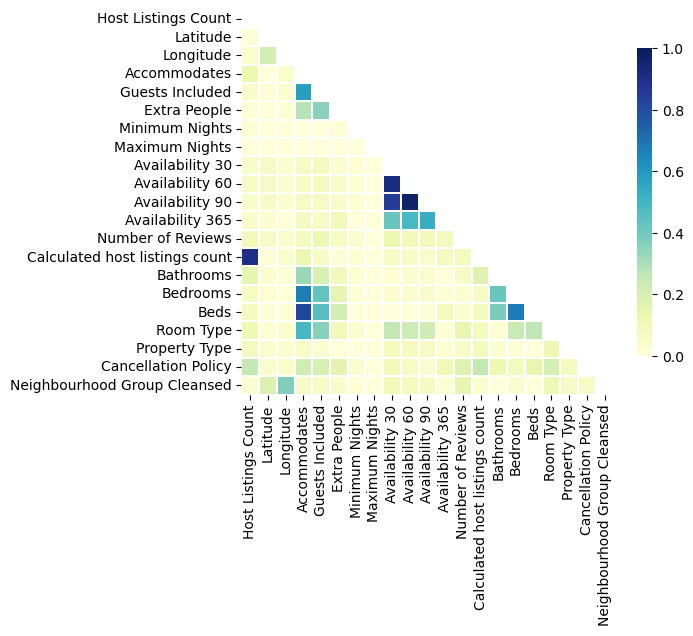

In [59]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(house_data.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 5))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

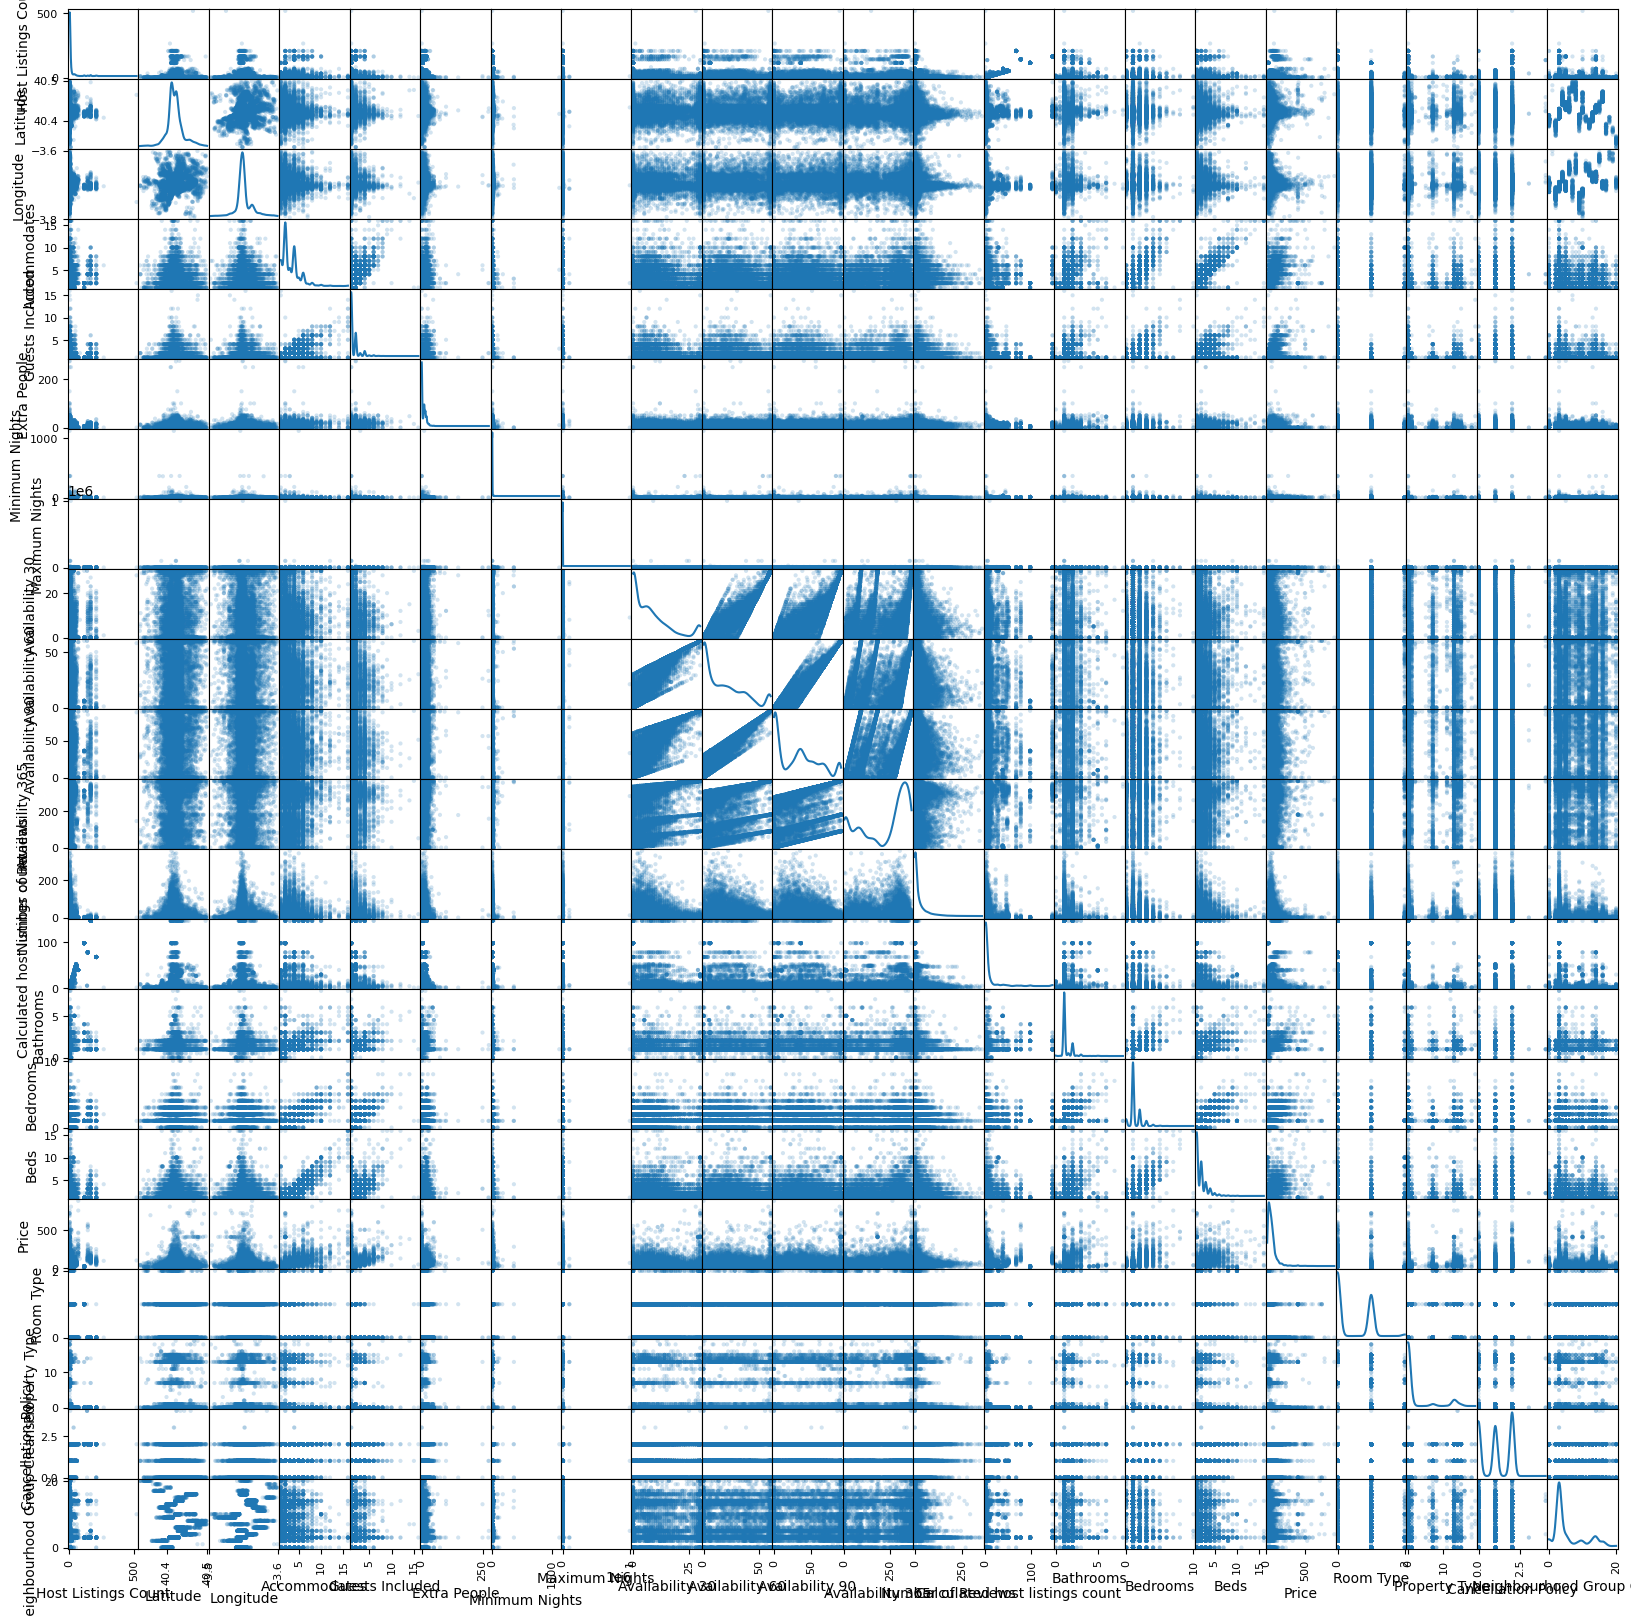

In [76]:
pd.plotting.scatter_matrix(house_data, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

In [60]:
# Combina Bedrooms, Beds y Accommodates en una métrica única para representar la capacidad total ajustada por características de la propiedad:
house_data['Adjusted Capacity'] = house_data['Accommodates'] + 0.5 * house_data['Beds'] + 0.25 * house_data['Bedrooms']

# Relaciona la actividad de la propiedad (Number of Reviews) con su disponibilidad total. Esto podría ser útil para identificar propiedades más populares o mal registradas:
house_data['Review Ratio'] = house_data['Number of Reviews'] / (house_data['Availability 365'] + 1)

# Crea una métrica que capture el precio relativo de la propiedad por persona que puede alojar:
house_data['Price per Person'] = house_data['Price'] / house_data['Accommodates']

# Para variables categóricas como Property Type y Room Type, podrías generar promedios de precio por categoría y usarlos como nuevas características:
house_data['Avg Price by Room Type'] = house_data.groupby('Room Type')['Price'].transform('mean')
house_data['Avg Price by Property Type'] = house_data.groupby('Property Type')['Price'].transform('mean')



In [61]:
# Eliminar columnas de disponibilidad innecesarias
house_data = house_data.drop(columns=['Availability 30', 'Availability 60', 'Availability 90'])

# Renombrar Availability 365 (opcional)
house_data = house_data.rename(columns={'Availability 365': 'Availability'})

# Verificar los cambios
print(house_data.columns)


Index(['Host Listings Count', 'Latitude', 'Longitude', 'Accommodates',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Availability', 'Number of Reviews', 'Calculated host listings count',
       'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Room Type', 'Property Type',
       'Cancellation Policy', 'Neighbourhood Group Cleansed',
       'Adjusted Capacity', 'Review Ratio', 'Price per Person',
       'Avg Price by Room Type', 'Avg Price by Property Type'],
      dtype='object')


### Modelado, cross-validation y estudio de resultados en train y test

**Cargamos datos de Train**

In [62]:
# Carga de datos
house_data = pd.read_csv('./Practica/airbnb_train.csv', sep=';', decimal='.')

# Filtrar solo propiedades en Madrid
house_data = house_data[
    (house_data['Latitude'] >= 40.3) & (house_data['Latitude'] <= 40.5) &
    (house_data['Longitude'] >= -3.8) & (house_data['Longitude'] <= -3.6)
]

# Imputación
columns_with_mode = ['Room Type', 'Property Type', 'Cancellation Policy']
for col in columns_with_mode:
    house_data[col] = house_data[col].fillna(house_data[col].mode()[0])

# Imputar con la media para columnas numéricas
columns_with_mean = ['Price', 'Bathrooms', 'Bedrooms', 'Beds']
for col in columns_with_mean:
    house_data[col] = house_data[col].fillna(house_data[col].mean())

# Imputar con la mediana para otras columnas numéricas
columns_with_median = ['Minimum Nights', 'Maximum Nights', 'Availability 30']
for col in columns_with_median:
    house_data[col] = house_data[col].fillna(house_data[col].median())

from sklearn.preprocessing import LabelEncoder

# Definir las columnas categóricas a codificar
columns_label_encode = ['Room Type', 'Property Type', 'Cancellation Policy', 'Neighbourhood Group Cleansed']

# Inicializar el LabelEncoder
label_encoders = {}  # Guardar los encoders para cada columna

# Aplicar LabelEncoder a cada columna
for column in columns_label_encode:
    le = LabelEncoder()
    house_data[column] = le.fit_transform(house_data[column])
    label_encoders[column] = le  # Guardar el encoder para referencia futura
    
"""
# Ver los valores codificados y sus significados
for column, le in label_encoders.items():
    print(f"Categorías codificadas para '{column}':")
    for class_, encoded_value in zip(le.classes_, le.transform(le.classes_)):
        print(f"  {class_}: {encoded_value}")
"""

# Eliminamos las columnas  
columns_to_keep = [
    'Host Listings Count', 'Latitude', 'Longitude', 'Accommodates', 'Guests Included',
    'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30',
    'Availability 60', 'Availability 90', 'Availability 365', 'Number of Reviews',
    'Calculated host listings count', 'Bathrooms', 'Bedrooms', 'Beds', 'Price',  # Columna objetivo
    'Room Type', 'Property Type', 'Cancellation Policy', 'Neighbourhood Group Cleansed'
]

# Eliminar todas las columnas que no estén en la lista
house_data = house_data[columns_to_keep]

# Eliminamos outliers en bedrooms
property_categories = {
    0: "Apartment",
    1: "Bed & Breakfast",
    2: "Boutique Hotel",
    3: "Bungalow",
    4: "Camper/RV",
    5: "Casa Particular",
    6: "Chalet",
    7: "Condominium",
    8: "Dorm",
    9: "Earth House",
    10: "Guest Suite",
    11: "Guesthouse",
    12: "Hostel",
    13: "House",
    14: "Loft",
    15: "Other",
    16: "Serviced Apartment",
    17: "Tent",
    18: "Townhouse",
    19: "Villa"
}

# Crear un diccionario para almacenar los resultados
property_counts = {}

"""
# Iterar por cada categoría y contar las ocurrencias en 'Property Type'
for category_id, category_name in property_categories.items():
    count = house_data[house_data['Property Type'] == category_id].shape[0]
    property_counts[category_name] = count
    print(f"{category_name}: {count}")
"""

# Categorías a eliminar
categories_to_remove = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 16, 17, 18, 19]

# Filtrar el dataset para mantener solo las categorías relevantes
house_data_filtered = house_data[~house_data['Property Type'].isin(categories_to_remove)]

outliers_extremos = house_data[
    (house_data['Bedrooms'] > 6) | 
    (house_data['Bathrooms'] > 5) | 
    (house_data['Beds'] > 10) | 
    (house_data['Accommodates'] > 12)
]

# Filtrar propiedades con Availability en 0 en todas las columnas
fully_inactive_properties = house_data[
    (house_data['Availability 30'] == 0) &
    (house_data['Availability 60'] == 0) &
    (house_data['Availability 90'] == 0) &
    (house_data['Availability 365'] == 0)
]

# Eliminar estas propiedades del dataset original
house_data_filtered = house_data.drop(fully_inactive_properties.index)

# Generamos características
# Combina Bedrooms, Beds y Accommodates en una métrica única para representar la capacidad total ajustada por características de la propiedad:
house_data['Adjusted Capacity'] = house_data['Accommodates'] + 0.5 * house_data['Beds'] + 0.25 * house_data['Bedrooms']

# Relaciona la actividad de la propiedad (Number of Reviews) con su disponibilidad total. Esto podría ser útil para identificar propiedades más populares o mal registradas:
house_data['Review Ratio'] = house_data['Number of Reviews'] / (house_data['Availability 365'] + 1)

# Crea una métrica que capture el precio relativo de la propiedad por persona que puede alojar:
house_data['Price per Person'] = house_data['Price'] / house_data['Accommodates']

# Para variables categóricas como Property Type y Room Type, podrías generar promedios de precio por categoría y usarlos como nuevas características:
house_data['Avg Price by Room Type'] = house_data.groupby('Room Type')['Price'].transform('mean')
house_data['Avg Price by Property Type'] = house_data.groupby('Property Type')['Price'].transform('mean')

# Eliminar columnas de disponibilidad innecesarias
house_data = house_data.drop(columns=['Availability 30', 'Availability 60', 'Availability 90'])

# Renombrar Availability 365 (opcional)
house_data = house_data.rename(columns={'Availability 365': 'Availability'})

**Cargamos datos de Test**

In [63]:
# Carga de datos
house_data_test = pd.read_csv('./Practica/airbnb_test.csv', sep=';', decimal='.')

# Filtrar solo propiedades en Madrid
house_data_test = house_data_test[
    (house_data_test['Latitude'] >= 40.3) & (house_data_test['Latitude'] <= 40.5) &
    (house_data_test['Longitude'] >= -3.8) & (house_data_test['Longitude'] <= -3.6)
]

# Imputación
columns_with_mode = ['Room Type', 'Property Type', 'Cancellation Policy']
for col in columns_with_mode:
    house_data_test[col] = house_data_test[col].fillna(house_data_test[col].mode()[0])

# Imputar con la media para columnas numéricas
columns_with_mean = ['Price', 'Bathrooms', 'Bedrooms', 'Beds']
for col in columns_with_mean:
    house_data_test[col] = house_data_test[col].fillna(house_data_test[col].mean())

# Imputar con la mediana para otras columnas numéricas
columns_with_median = ['Minimum Nights', 'Maximum Nights', 'Availability 30']
for col in columns_with_median:
    house_data_test[col] = house_data_test[col].fillna(house_data_test[col].median())

from sklearn.preprocessing import LabelEncoder

# Definir las columnas categóricas a codificar
columns_label_encode = ['Room Type', 'Property Type', 'Cancellation Policy', 'Neighbourhood Group Cleansed']

# Inicializar el LabelEncoder
label_encoders = {}  # Guardar los encoders para cada columna

# Aplicar LabelEncoder a cada columna
for column in columns_label_encode:
    le = LabelEncoder()
    house_data_test[column] = le.fit_transform(house_data_test[column])
    label_encoders[column] = le  # Guardar el encoder para referencia futura

"""
# Ver los valores codificados y sus significados
for column, le in label_encoders.items():
    print(f"Categorías codificadas para '{column}':")
    for class_, encoded_value in zip(le.classes_, le.transform(le.classes_)):
        print(f"  {class_}: {encoded_value}")
    print("\n")
"""

# Eliminamos las columnas  
columns_to_keep = [
    'Host Listings Count', 'Latitude', 'Longitude', 'Accommodates', 'Guests Included',
    'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30',
    'Availability 60', 'Availability 90', 'Availability 365', 'Number of Reviews',
    'Calculated host listings count', 'Bathrooms', 'Bedrooms', 'Beds', 'Price',  # Columna objetivo
    'Room Type', 'Property Type', 'Cancellation Policy', 'Neighbourhood Group Cleansed'
]

# Eliminar todas las columnas que no estén en la lista
house_data_test = house_data_test[columns_to_keep]

# Eliminamos outliers en bedrooms
property_categories = {
    0: "Apartment",
    1: "Bed & Breakfast",
    2: "Boutique Hotel",
    3: "Bungalow",
    4: "Camper/RV",
    5: "Casa Particular",
    6: "Chalet",
    7: "Condominium",
    8: "Dorm",
    9: "Earth House",
    10: "Guest Suite",
    11: "Guesthouse",
    12: "Hostel",
    13: "House",
    14: "Loft",
    15: "Other",
    16: "Serviced Apartment",
    17: "Tent",
    18: "Townhouse",
    19: "Villa"
}

# Crear un diccionario para almacenar los resultados
property_counts = {}

"""
# Iterar por cada categoría y contar las ocurrencias en 'Property Type'
for category_id, category_name in property_categories.items():
    count = house_data_test[house_data_test['Property Type'] == category_id].shape[0]
    property_counts[category_name] = count
    print(f"{category_name}: {count}")
"""

# Categorías a eliminar
categories_to_remove = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 16, 17, 18, 19]

# Filtrar el dataset para mantener solo las categorías relevantes
house_data_filtered = house_data[~house_data['Property Type'].isin(categories_to_remove)]

outliers_extremos = house_data_test[
    (house_data_test['Bedrooms'] > 6) | 
    (house_data_test['Bathrooms'] > 5) | 
    (house_data_test['Beds'] > 10) | 
    (house_data_test['Accommodates'] > 12)
]

# Filtrar propiedades con Availability en 0 en todas las columnas
fully_inactive_properties = house_data_test[
    (house_data_test['Availability 30'] == 0) &
    (house_data_test['Availability 60'] == 0) &
    (house_data_test['Availability 90'] == 0) &
    (house_data_test['Availability 365'] == 0)
]

# Eliminar estas propiedades del dataset original
house_data_test_filtered = house_data_test.drop(fully_inactive_properties.index)

# Generamos características
# Combina Bedrooms, Beds y Accommodates en una métrica única para representar la capacidad total ajustada por características de la propiedad:
house_data_test['Adjusted Capacity'] = house_data_test['Accommodates'] + 0.5 * house_data_test['Beds'] + 0.25 * house_data_test['Bedrooms']

# Relaciona la actividad de la propiedad (Number of Reviews) con su disponibilidad total. Esto podría ser útil para identificar propiedades más populares o mal registradas:
house_data_test['Review Ratio'] = house_data_test['Number of Reviews'] / (house_data_test['Availability 365'] + 1)

# Crea una métrica que capture el precio relativo de la propiedad por persona que puede alojar:
house_data_test['Price per Person'] = house_data_test['Price'] / house_data_test['Accommodates']

# Para variables categóricas como Property Type y Room Type, podrías generar promedios de precio por categoría y usarlos como nuevas características:
house_data_test['Avg Price by Room Type'] = house_data_test.groupby('Room Type')['Price'].transform('mean')
house_data_test['Avg Price by Property Type'] = house_data_test.groupby('Property Type')['Price'].transform('mean')

# Eliminar columnas de disponibilidad innecesarias
house_data_test = house_data_test.drop(columns=['Availability 30', 'Availability 60', 'Availability 90'])

# Renombrar Availability 365 (opcional)
house_data_test = house_data_test.rename(columns={'Availability 365': 'Availability'})


In [64]:
from sklearn import preprocessing

# Dataset de train
data_train = house_data.values
y_train = data_train[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data_train[:,1:]      # nos quedamos con el resto

# Dataset de test
data_test = house_data_test.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto

In [65]:
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

In [66]:
print('Datos entrenamiento: ', XtrainScaled.shape)
print('Datos test: ', XtestScaled.shape)

Datos entrenamiento:  (10535, 23)
Datos test:  (2642, 23)


Valores nulos en y_train: 3
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ..........................................alpha=0.1; total time=   0.2s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.8s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END .............................alpha=5.45559478116852; total time=   0.1s
[CV] END .............................alpha=5.45559478116852; total time=   0.0s
[CV] END ...........

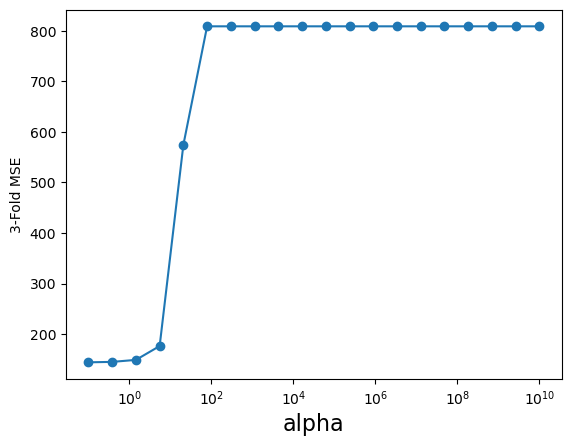

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,10,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 3, verbose=2)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('3-Fold MSE')
plt.show()



In [69]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

feature_names = house_data.columns[1:] # es igual en train y en test

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

ValueError: Input y contains NaN.